# Example annotation workflow
Demonstrate the main functionalities for `cell-annotator` to query cell type labels. 

Using the NeurIPS 2021 data: https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE194122

We'll use `cellxgene_census` to download some example data, please follow the [installation instructions](https://chanzuckerberg.github.io/cellxgene-census/index.html) to get started. 

Changelog
- XXX. 

## Preliminaries

### Dependecy notebooks

Links to notebooks/scripts that this analysis depends on. 

### Library imports

`autoreload` to re-load packages. 

In [1]:
%load_ext autoreload
%autoreload 2

The actual imports. 

In [2]:
import os
import scanpy as sc
from dotenv import load_dotenv
from IPython.display import Markdown, display

import cell_annotator as ca
# import cellxgene_census

/Users/mlange/mambaforge/envs/cell-annotator/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/Users/mlange/mambaforge/envs/cell-annotator/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
/Users/mlange/mambaforge/envs/cell-annotator/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_hdf from `anndata` is deprecated. Import anndata.io.read_hdf instead.
  warnings.warn(msg, FutureWarning)
/Users/mlange/mambaforge/envs/cell-annotator/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/Users/mlange/mambaforge/envs/cell-annotator/lib/python3.12/site-p

Print package versions. 

In [3]:
sc.logging.print_version_and_date()

Running Scanpy 1.10.3, on 2024-12-09 16:49.


### General settings

To use this package, you need to set up your OpenAI API key, please seen the README for more information. Once you have the API key, we recommend placing it in a `.env` file in the root of this repository. You can then use `dotenv` to locate the environment file and to set up an environmental variable containing your API key. 

In [4]:
load_dotenv()

True

### Function definitions

Any utility functions you may need in this notebook go here. 

### Data loading

Get an original (source) AnnData object. Download from cellxgene census if it doesn't already exist. 

In [6]:
# file_path = "data/pancreas.h5ad"

# if os.path.exists(file_path):
#     print("Loading existing data.")
#     adata = sc.read_h5ad(file_path)
# else:
#     print("Downloading data from cellxgene")
#     cellxgene_census.download_source_h5ad(
#         "07f14e26-ff0d-43c4-bfe3-bf1a94dc73c3", 
#         to_path=file_path
#     )
#     adata = sc.read_h5ad(file_path)

# adata

Loading existing data.


AnnData object with n_obs × n_vars = 7011 × 27255
    obs: 'mt_frac', 'n_counts', 'n_genes', 'treatment', 'doublet_score', 'louvain_anno_broad', 'louvain_anno_fine', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'organism_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'donor_id', 'suspension_type', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length'
    uns: 'citation', 'default_embedding', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_pca', 'X_umap'

In [22]:
adata = sc.read_h5ad("data/GSE194122_openproblems_neurips2021_multiome_BMMC_processed.h5ad")
adata

AnnData object with n_obs × n_vars = 69249 × 129921
    obs: 'GEX_pct_counts_mt', 'GEX_n_counts', 'GEX_n_genes', 'GEX_size_factors', 'GEX_phase', 'ATAC_nCount_peaks', 'ATAC_atac_fragments', 'ATAC_reads_in_peaks_frac', 'ATAC_blacklist_fraction', 'ATAC_nucleosome_signal', 'cell_type', 'batch', 'ATAC_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker'
    var: 'feature_types', 'gene_id'
    uns: 'ATAC_gene_activity_var_names', 'dataset_id', 'genome', 'organism'
    obsm: 'ATAC_gene_activity', 'ATAC_lsi_full', 'ATAC_lsi_red', 'ATAC_umap', 'GEX_X_pca', 'GEX_X_umap'
    layers: 'counts'

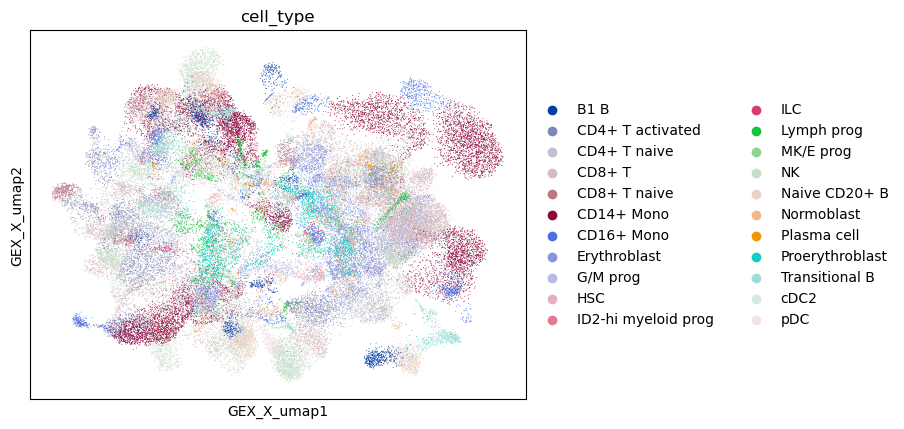

In [23]:
sc.pl.embedding(adata, basis="GEX_X_umap", color="cell_type")

## Query expected cell types and their markers

In [ ]:
expected_types, expected_markers = ca.tl.get_expected_cell_types(
    species='human', tissue='bone marrow mononuclear cells', model='gpt-4', max_tokens=800
)

INFO     Querying cell types.                                                                                      
INFO     Querying cell type markers.                                                                               


Let's see what we found. 

In [9]:
display(Markdown(expected_types))

- Pancreatic Progenitor Cells
- Pancreatic Stem Cells
- Pancreatic Ductal Cells
- Pancreatic Acinar Cells
- Pancreatic Beta Cells
- Pancreatic Alpha Cells
- Pancreatic Delta Cells
- Pancreatic Epsilon Cells
- Pancreatic PP Cells
- Endothelial Cells
- Stellate Cells
- Immune Cells
    - Dendritic Cells
    - T-cells
    - B-cells
    - Macrophages
    - Natural Killer Cells
- Fibroblasts
- Neurons
- Adipose Cells

In terms of marker genes: 

In [10]:
display(Markdown(expected_markers))

- Pancreatic Progenitor Cells: Pdx1, Nkx6-1, Sox9, Hnf6, Mnx1
- Pancreatic Stem Cells: Nes, Lin28A, Gli1, Sox2, Sca-1
- Pancreatic Ductal Cells: Sox9, Hnf1b, Krt19, Acta2, Cftr
- Pancreatic Acinar Cells: Amy2a, Elastase3b, Cpa1, Ptf1a, Gif
- Pancreatic Beta Cells: Ins1, Ins2, Pdx1, Nkx6-1, Glut2
- Pancreatic Alpha Cells: Gcg, Arx, Pax6, Pc2, Iapp
- Pancreatic Delta Cells: Sst, Hhex, Isl1, Pax6, Sstr2
- Pancreatic Epsilon Cells: Ghrl, Pax4, Isl1, Pc1/3, Cpe
- Pancreatic PP Cells: Ppy, Nkx2-2, Pax6, Pc1/3, Nkx6-1
- Endothelial Cells: Cdh5, Pecam1, Kdr, Tie-1, Vegfr2
- Stellate Cells: Gfap, Desmin, Acta2, Nestin, Vim
- Dendritic Cells: Cd11c, Mhc-II, F4/80, Cd80, Cd86
- T-cells: Cd3, Cd4, Cd8, Tcrb, Zap70
- B-cells: Cd19, Cd20, Cd79a, IgM, Pax5
- Macrophages: Cd68, F4/80, Cd11b, Arg1, Ccr2
- Natural Killer Cells: Ncr1, Klrk1, Gzmb, Prf1, Nkp46 
- Fibroblasts: Col1a1, Vim, Fn1, S100a4, Fsp1
- Neurons: Nefl, Nefm, Syt1, Gria1, NeuN
- Adipose Cells: Lep, Pparg, Cebpa, Fabp4, Adipoq

### Compute marker genes

We'll use the clustering supplied with the dataset. 

In [18]:
marker_dfs = ca.pp.get_markers_per_cluster(adata, cluster_key="cell_type", use_raw=False)

  0%|          | 0/4 [00:00<?, ?it/s]

AttributeError: 'csr_matrix' object has no attribute 'A'